# Data preprocess

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

tf.__version__

'2.5.0'

In [2]:
# import tarfile
# tar_train_val = tarfile.open('./data/VOCtrainval_06-Nov-2007.tar')
# tar_train_val.extractall('./data/')

In [3]:
def load_classes_from_txt(file_path):
    
    file_name = os.path.basename(file_path)
    
    class_name = file_name.split('_')[0]
    
    df = pd.read_csv(file_path, sep='\s+| |  ', engine='python', 
                     header=None)
    
    df.columns = ['file_name', class_name]
    
    df.loc[df[class_name]==-1, class_name] = 0
    
    return df
    

In [4]:
# data = load_classes_from_txt('./data/VOCdevkit/VOC2007/ImageSets/Main/aeroplane_train.txt')
# data.head()

In [5]:
# file_name = os.path.basename('./data/VOCdevkit/VOC2007/ImageSets/Main/aeroplane_train.txt')
# file_name.split('_')[0]

In [49]:
def get_dataframe_with_classes_in_images(folder_path, which_set='train'):
    
    '''
    Returns DataFrame with class annotations for every image in chosen set.
    
    Args:
        folder_path -- path to folder containing .txt files with labels
        which_set -- 'train', 'trainval', 'val', 'test'
    '''
    
    for root, _, files in os.walk(folder_path):
        pass
    
    # create dataframes with file name column 
    df_all_classes = pd.read_csv(f'{root}{which_set}.txt', header=None, dtype=str)
    df_all_classes.columns = ['file_name']
    
    # loops through all file names in the folder
    for file_name in files:
        
        # exclude txt files without information about class apperance in a image
        if file_name not in ['train.txt', 'trainval.txt', 'val.txt', 'test.txt']:
            
            #  get information which of dataset's splits the file relates to
            ds_part = file_name.split('_')[1]
            
            file_path = root + file_name
            
            # function for getting dataframe from txt file
            df = load_classes_from_txt(file_path=file_path)
         
            # check if annotations are for images of chosen set
            if ds_part==(which_set+'.txt'):
                
                # statment check if columns are equal before concatenation
                if not df_all_classes['file_name'].astype('int').equals(df['file_name']):
                    print('File name columns are not equal!')
                
                df_all_classes = pd.concat([df_all_classes, df.iloc[:, 1]], axis=1)
            
            else:
                pass
            

    # get column names exluding 'file_name'
    cols = df_all_classes.columns.tolist()[1:]
        
    cols.sort()
    
    cols.insert(0, 'file_name')
    
#     print(cols)

    # rearrange columns order
    df_all_classes = df_all_classes[cols]
           
    return df_all_classes



In [50]:
folder_path = './data/VOCdevkit/VOC2007/ImageSets/Main/'

df_train = get_dataframe_with_classes_in_images(folder_path, which_set='train')
df_trainval = get_dataframe_with_classes_in_images(folder_path, which_set='trainval')
df_val = get_dataframe_with_classes_in_images(folder_path, which_set='val')

test_path = './data/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/ImageSets/Main/'

df_test = get_dataframe_with_classes_in_images(test_path, 'test')

In [46]:
df_train

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000012,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000017,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,000023,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,000026,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,009944,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2497,009945,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2498,009949,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2499,009959,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_trainval

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,000007,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000009,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,000012,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,009954,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5007,009955,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5008,009958,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5009,009959,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_val

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,000007,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000009,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,000016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000019,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,009947,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2506,009950,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2507,009954,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2508,009955,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_test

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000001,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,000002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,000003,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,000004,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000006,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,009956,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4948,009957,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4949,009960,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4950,009962,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Graphs

In [79]:
def display_graph_of_images_count(dataframe):
    
    ax = dataframe.plot(kind='bar', figsize=(20, 15), title='Images count per class',
                        xlabel='Class', ylabel='Count', legend=False, fontsize=12)
    
    ax.legend(fontsize=12)

    for i in range(len(dataframe.columns)):
        ax.bar_label(ax.containers[i], label_type='edge', rotation=90, fontsize=12, padding=3)

    ax.margins(y=0.1)

In [76]:
df_train_class_count = pd.DataFrame(df_train.sum().iloc[1:], columns=['train'])

df_val_class_count = pd.DataFrame(df_val.sum().iloc[1:], columns=['val'])

df_test_class_count = pd.DataFrame(df_test.sum().iloc[1:], columns=['test'])

df_class_count = pd.concat([df_train_class_count, df_val_class_count, df_test_class_count], axis=1)

df_class_count['total']= df_class_count.sum(axis=1).astype('int')


In [86]:
df_class_count = df_class_count.sort_values(by=['total'], ascending=False)

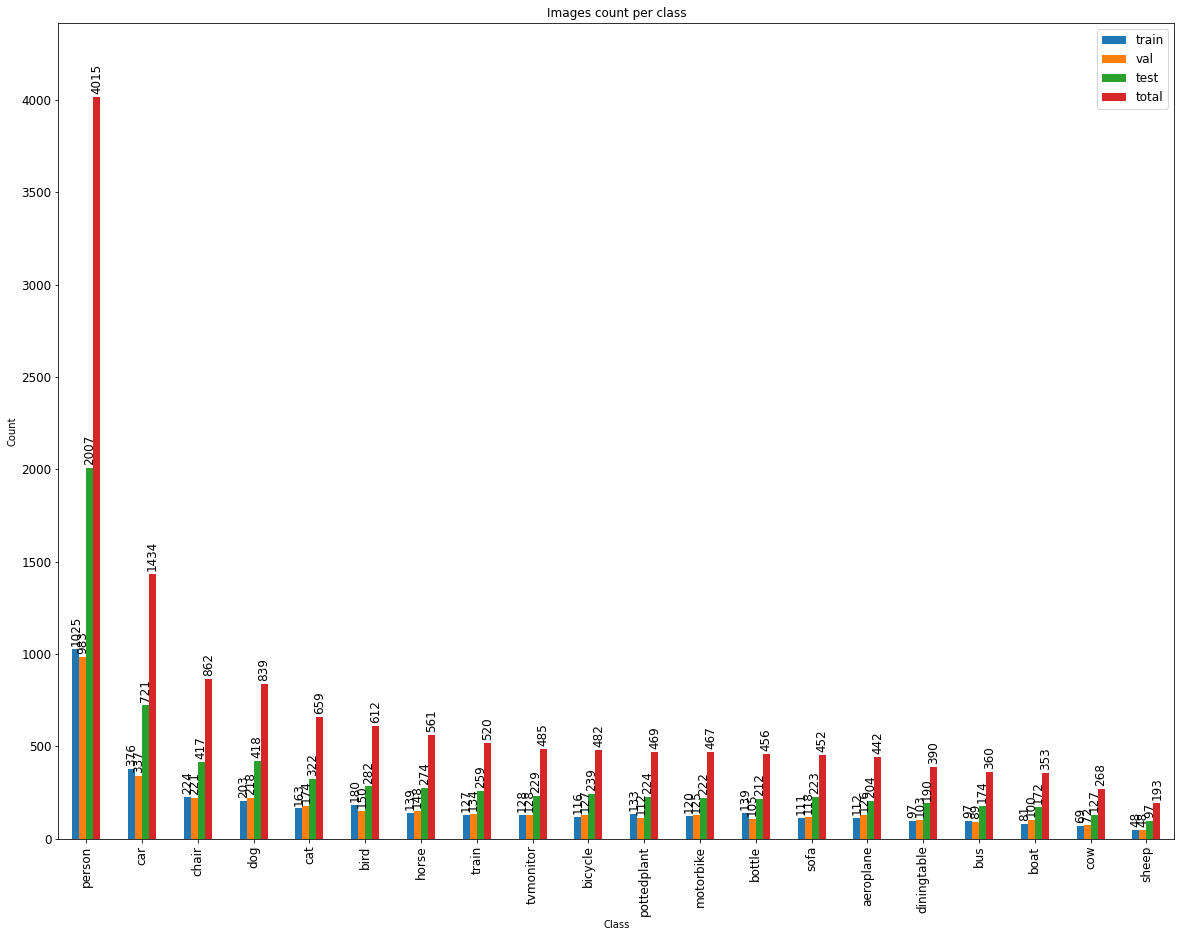

In [87]:
display_graph_of_images_count(df_class_count)

Most common class found in images by far is 'person'. Next are: 'car' --> 'chair' --> 'dog'

The least amount of images depict sheeps with only 193 images in total of around 10k of images! Other classes are also not faring better. 